In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


In [50]:
# Read data into dataframes 

home_value = pd.read_csv('homevalue.csv')
median_income = pd.read_excel('median_income.xlsx', sheet_name='Sheet1')

home_value.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31
0,102001,0,United States,country,NaN,119729.572640,119940.215341,120201.443305,120761.726012,121406.544234,...,350165.829700,351570.606154,352120.860853,352265.907749,352504.359843,352945.853239,353522.496915,354005.575460,354711.020713,355327.955070
1,394913,1,"New York, NY",msa,NY,214911.652349,215824.905614,216746.617250,218614.361683,220548.475724,...,647851.001125,652477.077381,655536.133683,658263.386724,661979.750511,665977.942675,669477.234967,672228.240789,673999.838327,675063.976036
2,753899,2,"Los Angeles, CA",msa,CA,218489.647448,219302.706154,220385.692595,222540.471813,224897.124751,...,911031.498845,916863.716873,920777.178084,925109.643477,930243.585193,936603.517696,941773.674116,946228.303841,950210.062120,950740.494586
3,394463,3,"Chicago, IL",msa,IL,150432.480390,150571.737044,150836.953795,151496.747161,152290.399220,...,311972.006665,314053.134292,315253.946820,315976.493240,316881.631507,317866.656523,318826.563429,319846.118364,321070.725716,322389.516129
4,394514,4,"Dallas, TX",msa,TX,125268.936932,125324.732154,125388.874474,125555.445340,125775.064467,...,372240.198836,372383.086130,371723.001722,370790.474579,370143.446717,369946.958796,369841.800601,369555.460608,369035.088390,368515.900537
5,394692,5,"Houston, TX",msa,TX,121445.891951,121468.513592,121383.719268,121434.404294,121481.159606,...,306473.992737,307007.423050,306889.410405,306526.817839,306309.415498,306247.064677,306049.283507,305716.951301,305539.457811,305480.078502
6,395209,6,"Washington, DC",msa,VA,178715.808494,178861.118295,179128.933876,179735.345332,180657.193831,...,552721.857140,556137.862993,557812.715078,558372.233424,558888.746681,560312.151900,562382.785308,564682.658703,566740.444275,568309.985098
7,394974,7,"Philadelphia, PA",msa,PA,119253.125968,119518.181024,119699.070549,120145.434054,120577.383072,...,351338.151595,353349.554670,354253.803794,354628.799425,355338.487809,356485.560449,357792.318603,358883.850814,360070.209998,361160.597202
8,394856,8,"Miami, FL",msa,FL,112161.594666,112469.501738,112795.559504,113454.267196,114091.706444,...,483613.706399,485293.909777,485856.483975,486046.366497,486066.100977,486121.700032,485681.106405,484724.135102,483888.809901,483279.946692
9,394347,9,"Atlanta, GA",msa,GA,143808.708064,144140.162485,144530.677149,145361.258724,146289.164055,...,378405.987076,379537.157308,379757.932962,379556.802096,379415.220758,379245.236752,378790.752521,377971.717713,377127.804830,376332.631550


In [51]:
threshold = 0.4
home_value = home_value.loc[home_value.isnull().mean(axis=1) < threshold]

# Interpolate across columns (i.e., across time for each region)
home_value.iloc[:, 5:] = home_value.iloc[:, 5:].interpolate(axis=1)

# Optionally fill any remaining edge NaNs with forward/backward fill
home_value.iloc[:, 5:] = home_value.iloc[:, 5:].bfill(axis=1).ffill(axis=1)

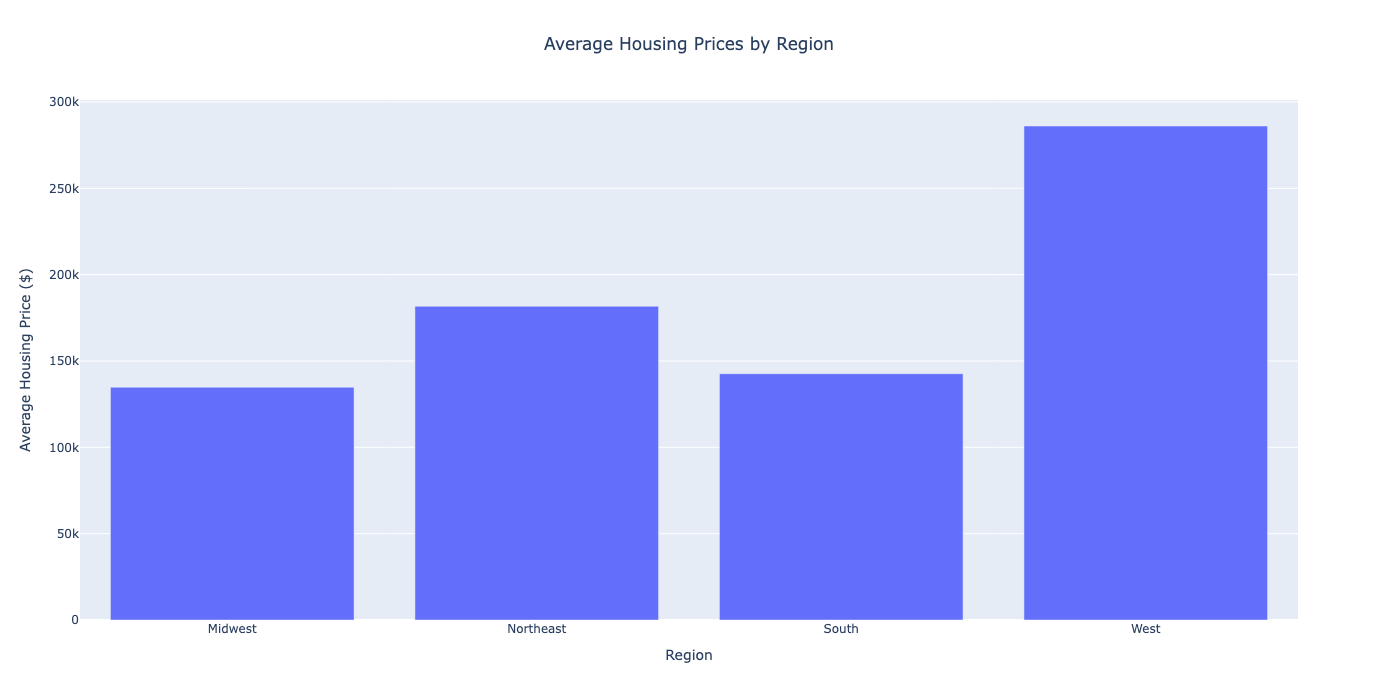

In [61]:
import plotly.express as px
import plotly.graph_objects as go

# Assuming hv is the home_value DataFrame
hv = home_value.copy()

region_mapping = {
    # list of states given, paired with their region
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast', 
    'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'NJ': 'Northeast', 'PA': 'Northeast',
    
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest',
    'MO': 'Midwest', 'WI': 'Midwest', 'IL': 'Midwest', 'IN': 'Midwest', 'OH': 'Midwest', 'MI': 'Midwest',
    
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South', 'WV': 'South', 'NC': 'South', 'SC': 'South', 
    'GA': 'South', 'FL': 'South', 'KY': 'South', 'TN': 'South', 'AL': 'South', 'MS': 'South', 'AR': 'South', 
    'LA': 'South', 'OK': 'South', 'TX': 'South',
    
    'MT': 'West', 'ID': 'West', 'WY': 'West', 'CO': 'West', 'NM': 'West', 'AZ': 'West', 'UT': 'West', 
    'NV': 'West', 'WA': 'West', 'OR': 'West', 'CA': 'West', 'AK': 'West', 'HI': 'West'
}


# Add region column based on the state abbreviation
hv['RegionName'] = hv['StateName'].map(region_mapping)

# Grab Columns
categorical_columns = hv.columns[:5]
dates = hv.columns[5:]

# Convert to date time and melt the DataFrame
df_melted = hv.melt(id_vars=categorical_columns, value_vars=dates, var_name='Date', value_name='Value')
df_melted['Date'] = pd.to_datetime(df_melted['Date'])
df_melted = df_melted.dropna(subset=['Value'])

# Sort the DataFrame
df_sorted = df_melted.sort_values(by=["StateName", "Date"])

df_region = df_sorted.groupby("StateName")['Value'].mean().reset_index()

# Create the Plotly scatter plot
fig = px.bar(df_sorted, x="Date", y="Value", color="StateName", 
              title="Housing Prices Over The Years based by US State",
              labels={"Date": "Year (2000-2024)", "Value": "Log of House Value ($)", "StateName": "State Abbreviation"},
              width=1400, height=700, hover_data=["StateName"])

# Update layout for better spacing
fig.update_layout(
    legend_title="State Abbreviation",
    legend=dict(title="State Abbreviation", orientation="h", yanchor="bottom", y=-0.3, xanchor="right", x=1),
    xaxis_title="Year (2000-2024)",
    yaxis_title="House Value ($)",
    title_x=0.5  # Center the title
)

fig.update_traces(marker=dict(size=3))

def create_visibility(region):
    # Boolean indexing to filter the data based on the selected region
    return [True if hv['RegionName'].iloc[i] == region else False for i in range(len(hv))]

fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'label': 'All',
                    'method': 'update',
                    'args': [{'visible': [True] * len(fig.data)},{'xaxis': {'title': 'All Regions'}, 'yaxis': {'title': 'Average Housing Price per Region'}}]
                },{
                    'label': 'Northeast',
                    'method': 'update',
                    'args': [ {'visible': create_visibility('Northeast')
                    },{'xaxis': {'title': 'Northeast'}, 'yaxis': {'title': 'Average Housing Price in the Northeast'}, 
                              'x': ['Northeast']}]
                },{
                    'label': 'West',
                    'method': 'update',
                    'args': [{'visible': create_visibility('West')}, {'xaxis': {'title': 'West'}, 'yaxis': {'title': 'Average Housing Price in the West'}, 
                              'x': ['West']}]
                },{
                    'label': 'Midwest',
                    'method': 'update',
                    'args': [{'visible': create_visibility('Midwest')},{'xaxis': {'title': 'Midwest'}, 'yaxis': {'title': 'Average Housing Price in the Midwest'}, 
                              'x': ['Midwest']}]
                },{
                    'label': 'South',
                    'method': 'update',
                    'args': [{'visible': create_visibility('South')},{'xaxis': {'title': 'South'}, 'yaxis': {'title': 'Average Housing Price in the South'}, 
                              'x': ['South']}]
                }
            ],
            
            'direction': 'down',
            'showactive': True,
            'active': 0,  # "All" is the default
            'x': 0.17,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top',
        }
    ],
    xaxis_title="Region",
    yaxis_title="Average Housing Price per Region",
    title_x=0.5  # Center the title
)

fig.show()

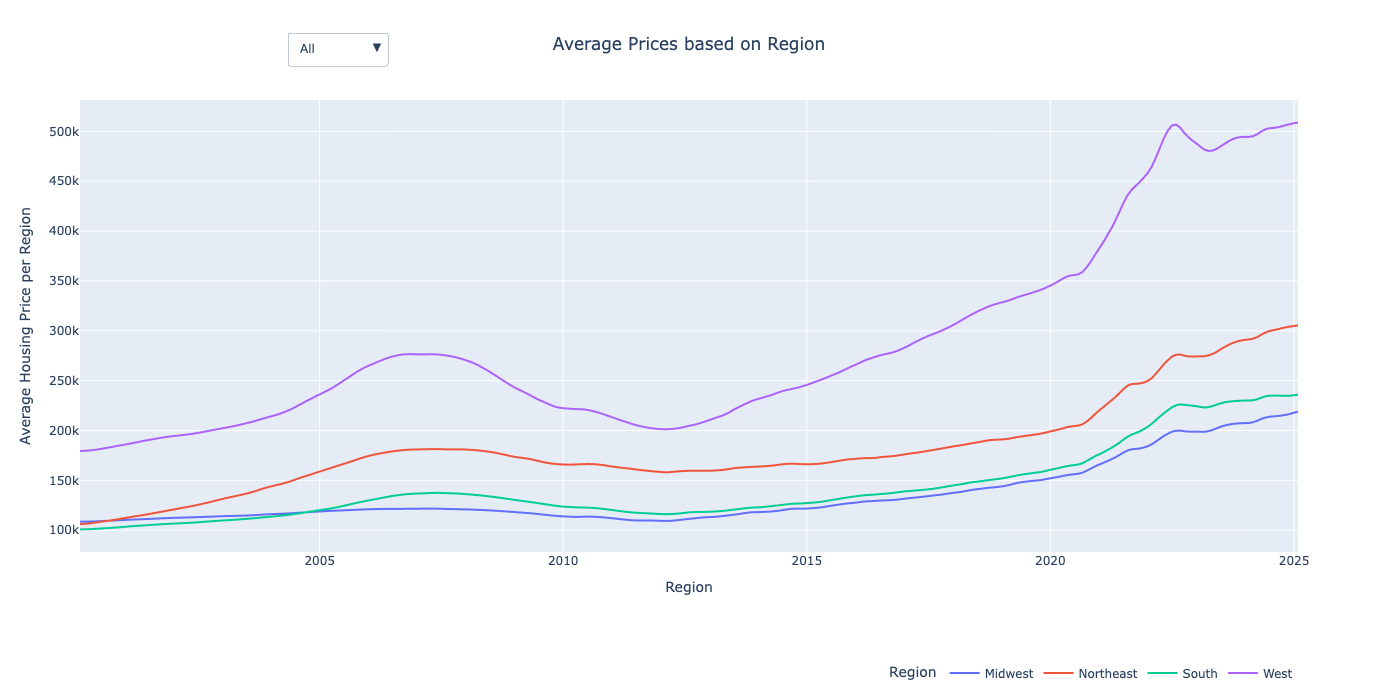

In [57]:
import plotly.express as px
import plotly.graph_objects as go

# Assuming hv is the home_value DataFrame
hv = home_value.copy()

region_mapping = {
    # list of states given, paired with their region
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast', 
    'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'NJ': 'Northeast', 'PA': 'Northeast',
    
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest',
    'MO': 'Midwest', 'WI': 'Midwest', 'IL': 'Midwest', 'IN': 'Midwest', 'OH': 'Midwest', 'MI': 'Midwest',
    
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South', 'WV': 'South', 'NC': 'South', 'SC': 'South', 
    'GA': 'South', 'FL': 'South', 'KY': 'South', 'TN': 'South', 'AL': 'South', 'MS': 'South', 'AR': 'South', 
    'LA': 'South', 'OK': 'South', 'TX': 'South',
    
    'MT': 'West', 'ID': 'West', 'WY': 'West', 'CO': 'West', 'NM': 'West', 'AZ': 'West', 'UT': 'West', 
    'NV': 'West', 'WA': 'West', 'OR': 'West', 'CA': 'West', 'AK': 'West', 'HI': 'West'
}


# Add region column based on the state abbreviation
hv['RegionName'] = hv['StateName'].map(region_mapping)

# Grab Columns
categorical_columns = hv.columns[:5]
dates = hv.columns[5:]

# Convert to date time and melt the DataFrame
df_melted = hv.melt(id_vars=categorical_columns, value_vars=dates, var_name='Date', value_name='Value')
df_melted['Date'] = pd.to_datetime(df_melted['Date'])
df_melted = df_melted.dropna(subset=['Value'])

# Sort the DataFrame
df_sorted = df_melted.sort_values(by=["RegionName", "Date"])

df_region = df_sorted.groupby(["RegionName","Date"])['Value'].mean().reset_index()
# Create the Plotly scatter plot
fig = px.line(df_region, x="Date", y="Value", color="RegionName", 
              title="Average Prices based on Region",
              labels={"Date": "Year (2000-2024)", "Value": "Log of House Value ($)", "StateName": "State Abbreviation"},
              width=1400, height=700, hover_data=["RegionName"])

# Update layout for better spacing
fig.update_layout(
    legend_title="Region",
    legend=dict(title="Region", orientation="h", yanchor="bottom", y=-0.3, xanchor="right", x=1),
    xaxis_title="Year (2000-2024)",
    yaxis_title="House Value ($)",
    title_x=0.5  # Center the title
)

fig.update_traces(marker=dict(size=3))

def create_visibility(region):
    # Boolean indexing to filter the data based on the selected region
    return [True if hv['RegionName'].iloc[i] == region else False for i in range(len(hv))]

fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'label': 'All',
                    'method': 'update',
                    'args': [{'visible': [True] * len(fig.data)},{'xaxis': {'title': 'All Regions'}, 'yaxis': {'title': 'Average Housing Price per Region'}}]
                },{
                    'label': 'Northeast',
                    'method': 'update',
                    'args': [ {'visible': create_visibility('Northeast')
                    },{'xaxis': {'title': 'Northeast'}, 'yaxis': {'title': 'Average Housing Price in the Northeast'}, 
                              'x': ['Northeast']}]
                },{
                    'label': 'West',
                    'method': 'update',
                    'args': [{'visible': create_visibility('West')}, {'xaxis': {'title': 'West'}, 'yaxis': {'title': 'Average Housing Price in the West'}, 
                              'x': ['West']}]
                },{
                    'label': 'Midwest',
                    'method': 'update',
                    'args': [{'visible': create_visibility('Midwest')},{'xaxis': {'title': 'Midwest'}, 'yaxis': {'title': 'Average Housing Price in the Midwest'}, 
                              'x': ['Midwest']}]
                },{
                    'label': 'South',
                    'method': 'update',
                    'args': [{'visible': create_visibility('South')},{'xaxis': {'title': 'South'}, 'yaxis': {'title': 'Average Housing Price in the South'}, 
                              'x': ['South']}]
                }
            ],
            
            'direction': 'down',
            'showactive': True,
            'active': 0,  # "All" is the default
            'x': 0.17,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top',
        }
    ],
    xaxis_title="Region",
    yaxis_title="Average Housing Price per Region",
    title_x=0.5  # Center the title
)

fig.show()

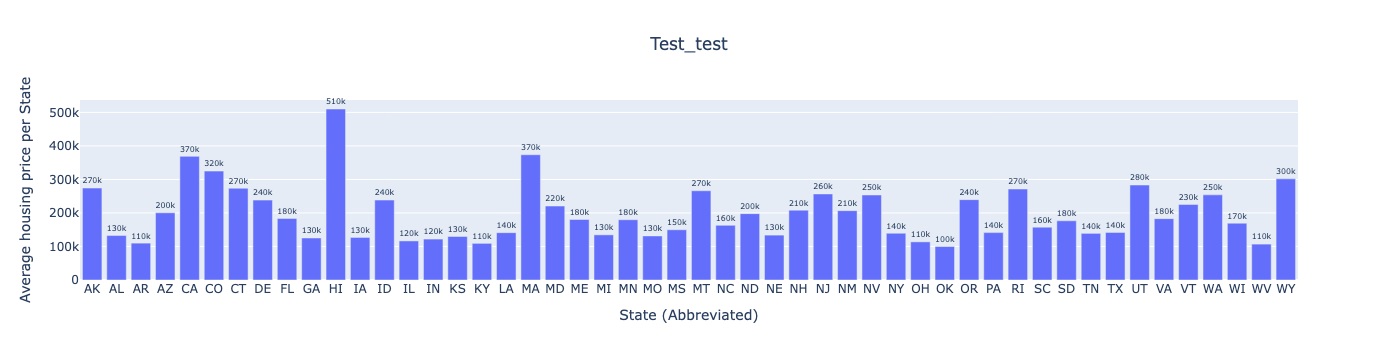

In [54]:
# Bar chart based on region

# Assuming hv is the home_value DataFrame
hv = home_value.copy()

# Grab Columns
categorical_columns = hv.columns[:5]
dates = hv.columns[5:]

# Convert to date time and melt the DataFrame
df_melted = hv.melt(id_vars=categorical_columns, value_vars=dates, var_name='Date', value_name='Value')
df_melted['Date'] = pd.to_datetime(df_melted['Date'])
df_melted = df_melted.dropna(subset=['Value'])

# Sort the DataFrame
df_sorted = df_melted.sort_values(by=["StateName", "Date"]).groupby(by="StateName")['Value'].mean()
df_sorted = df_sorted.reset_index()  # Convert the Series into a DataFrame

fig = px.bar(df_sorted, y= "Value", x="StateName", text_auto='.2s',title="Test_test")

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

# Update layout for better spacing
fig.update_layout(
    xaxis_title="State (Abbreviated)",
    yaxis_title="Average housing price per State",
    title_x=0.5  # Center the title
)

fig.show()

<Axes: >

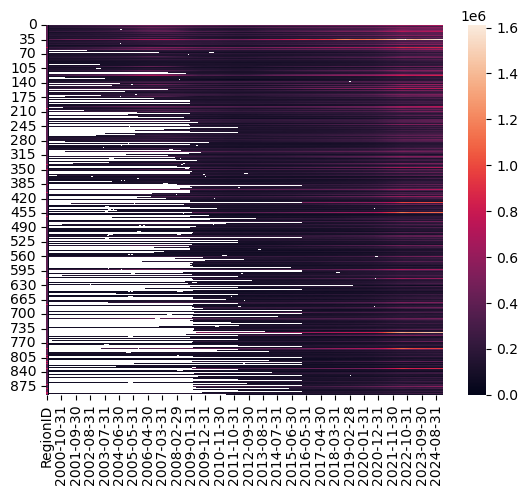

In [7]:
data_numeric = hv.select_dtypes('number')
sns.heatmap(data_numeric)

https://www.chase.com/personal/mortgage/education/financing-a-home/how-much-you-can-afford